# machine learning models  机器学习模型

## suppervised learning  监督学习

### single model  单模型
- linear model: linear regression, logistic regresssion, Lasso, Ridge  线性模型：线性回归，逻辑回归，套索回归，岭回归
- K-neighbor  k近邻
- decision tree: ID3, C5.0, CART  决策树：ID3, C5.0，CART生成树算法
- neural networks: perceptron, neural nerwork  神经网络：感知机，神经网络
- SVM(support vector machines): linearly separable, linearly support, linearly inseparable  支持向量机：线性可分，线性支持，线性不可分

### integrated learning  集成学习
- Boosting: GBDT, Ada Boost, XG Boost, Light GBM, Cat Boost
- Bagging: random forest

## unsuppervised learning  无监督学习

### clustering  聚类
- k-means
- hierarchical clustering  层次聚类
- general clustering  谱聚类

### dimensionality reduction  降维
- PCA
- SVD
- LDA

## probability learning  概率模型

### EM algorithm

### MCMC

### Bayesian  贝叶斯
- naive Bayes  朴素贝叶斯
- Bayesian networks  贝叶斯网络

### probaility graph  概率图
- CRF
- HMM

### maximum entropy model  最大熵模型


# 命名约定
- 变量名，全部小写，尽量英文单词，做到见名知意，单词之间使用下划线分隔
- 函数名，首字母大写，尽量英文单词，单词之间使用下划线分隔
- 类名，首字母大写，尽量英文单词，单词之间不需要使用下划线分隔
- 在此中可能使用一些常见的算法的缩写以及约定俗成的写法, 例如，梯度下降算法 GD，不需要的变量 _


# 平台环境
**任何不以结婚为目的的谈恋爱，都是耍流氓。**

**任何不解释平台环境的源代码，都是耍流氓。**

**平台环境**
- 计算机硬件架构 ARM & X86
- 操作系统 Windows & Unix & Linux & Mac
- 计算机语言 + 编译器 + 编辑器
- 第三方库的版本


**本平台环境， 源代码可移植性极高**
- 操作系统 Windows 7 64bit X86
- 浏览器 Google Chrome 版本 84.0.4147.105（正式版本） （64 位）
- Jupyter Lab jupyterlab 2.1.4
- Ipython 版本 7.12.0
- Python 版本 python 3.7
- Numpy 版本 1.18.1
- scikit-learn 版本 0.22.1
- matplotlib 版本 3.1.3

X_train shape =  (353, 10)
X_test shape =  (89, 10)
y_train shape =  (353, 1)
y_test shape =  (89, 1)
X_train data =  [[ 0.04534099 -0.04464164 -0.00620595 -0.01599922  0.1250187   0.1251981
   0.019187    0.03430886  0.03243323 -0.0052198 ]
 [ 0.09256399 -0.04464164  0.03690653  0.02187235 -0.02496016 -0.01665815
   0.00077881 -0.03949338 -0.02251217 -0.02178823]
 [ 0.06350368  0.05068012 -0.00405033 -0.01255635  0.10300346  0.04878988
   0.05600338 -0.00259226  0.08449528 -0.01764612]
 [ 0.09619652 -0.04464164  0.0519959   0.07925353  0.05484511  0.03657709
  -0.07653558  0.1413221   0.09864637  0.06105391]
 [ 0.01264814  0.05068012 -0.02021751 -0.00222774  0.03833367  0.05317396
  -0.00658447  0.03430886 -0.00514531 -0.00936191]]
y_train data =  [[219.]
 [ 70.]
 [202.]
 [230.]
 [111.]]
epoch 0 , loss 30022.909348441928 , 
epoch 1000 , loss 9184.6914033867 , 
epoch 2000 , loss 6331.822694886447 , 
epoch 3000 , loss 5911.074631424646 , 
epoch 4000 , loss 5819.720468869637 , 
epoch 500

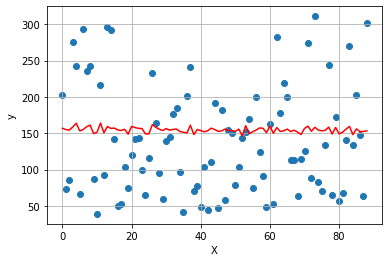

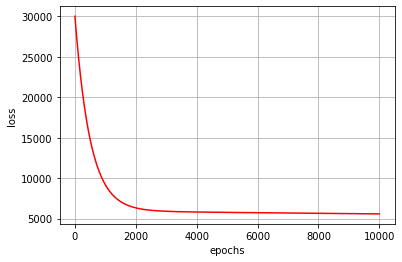

In [13]:
# 导入 numpy 模块，矩阵计算
import numpy as np

# 从 scikit-learn 中选择数据集 diabetes
from sklearn.datasets import load_diabetes

# 使用 scikit-learn 的 shuffle 功能，打乱数据集
from sklearn.utils import shuffle

# 利用 matplotlib 进行可视化操作
import matplotlib.pyplot as plt
# jupyter notebook 中嵌入 matplotlib 绘制的图形
%matplotlib inline

"""
# 定义函数，用于数据准备
# 1、加载数据集
# 2、将数据集打乱无序
# 3、数据集划分训练集 train 和测试集 test
# 4、查看数据集维度情况以及基本信息
"""
def Data_Processing():
    # 加载数据集
    diabetes = load_diabetes()
    # 获取数据矩阵 X
    data = diabetes.data
    # 或者数据标签值
    target = diabetes.target
    
    # 洗牌，打乱数据集
    X, y = shuffle(data, target, random_state=42)
    # 将 数据矩形 X 中数据类型设置为 numpy float32
    X = X.astype(np.float32)
    
    # 划分数据集为 训练集 train，测试集 test
    # train : test = 8 : 2
    split_size = int(X.shape[0] * 0.8)
    # 使用切片完成简单划分
    X_train, y_train = X[:split_size], y[:split_size]
    X_test, y_test = X[split_size:], y[split_size:]
    
    # 标签值 y 的维度变换
    # [n] => [n, 1]
    y_train = y_train.reshape((-1, 1))
    y_test = y_test.reshape((-1, 1))
    
    # 查看数据维度信息，以及基本信息
    print("X_train shape = ", X_train.shape)
    print("X_test shape = ", X_test.shape)
    print("y_train shape = ", y_train.shape)
    print("y_test shape = ", y_test.shape)
    
    print("X_train data = ", X_train[:5])    
    print("y_train data = ", y_train[:5])
    
    return X_train, y_train, X_test, y_test

"""
# 定义函数，初始化模型超参数 权重系数 w，偏置或者截距 b
# inputs：数据集维度 n，w需要与数据集进行矩阵乘法
# outputs：权重系数 w，偏置或者截距 b
"""
def Initialize_Hyperparams(dims):
    # w 必须创建为能与数据集 X 进行乘法运算的矩阵
    # 超参数初始化有多种方式
    # 将 w 和 b 全部初始化为 零
    w = np.zeros((dims, 1))
    b = 0
    
    return w, b

"""
# 定义函数，实现 线性模型 核心算法
# inputs：X 矩阵，标签值 y，权重系数 w，偏置或者截距 b
# outputs：预测值 y_hat，误差 loss，权值偏导数 dw，偏置偏导数 db
"""
def Linear_Model(X, y, w, b):
    # 获取数据矩阵 X 的行和列，也就是数据记录，以及特征
    train_num = X.shape[0]
    feature_num = X.shape[1]
    
    # 线性模型，数学公式 y_hat = X @ w + b
    y_hat = np.dot(X, w) + b
    
    # 损失函数计算，loss = (y - y_hat)**2
    loss = np.sum((y_hat - y) **2) / train_num 
    
    # 偏导数计算，数学公式
    dw = np.dot(X.T, (y_hat - y)) / train_num
    db = np.sum((y_hat - y)) / train_num
    
    return y_hat, loss, dw, db

"""
# 定义函数，使用GD梯度下降算法进行训练线性模型
# inputs：数据集 X 矩阵，标签值 y，学习率或者梯度下降步长 learning_rate，对数据训练次数 epochs
# outputs：每一次训练后的误差值列表 loss_list，最后一次训练误差 loss，最终线性模型参数 params，最终梯度值或者偏导数 grads
"""
def Linear_Train_GD(X, y, learning_rate, epochs):
    # 初始化线性模型超参数
    w, b = Initialize_Hyperparams(X.shape[1])
    # 创建列表，储存每次训练误差
    loss_list = []
    
    # 对数据集进行多次训练
    for i in range(epochs):
        # 训练线性模型
        y_hat, loss, dw, db = Linear_Model(X, y, w, b)
        # 将误差加入列表中
        loss_list.append(loss)
        
        # 梯度下降算法，优化算法，找到最优解
        # 更新梯度
        w += -learning_rate * dw
        b += -learning_rate * db
        
        # 每训练 1000 次，查看一下训练误差
        if i % 1000 == 0:
            print("epoch {} , loss {} , ".format(i, loss))
            
    # 训练结束后，保存训练后需要的信息
    # 保存模型超参数，字典形式储存
    params = {"w" : w, "b" : b}
    # 保存梯度信息，字典形式储存
    grads = {"dw" : dw, "db" : db}
        
    return loss_list, loss, params, grads

"""
# 定义函数，使用训练后的参数线性模型进行预测
# inputs：数据集 X 矩阵，模型超参数 params
# outputs：线性模型预测值矩阵 y_predict
"""
def Linear_Model_Predict(X, params):
    # 获取训练好的模型的超参数
    w = params["w"]
    b = params["b"]
    
    # 使用训练好的模型进行预测
    y_predict = np.dot(X, w) + b
    
    return y_predict

"""
# 定义函数，可视化测试集的真实值和预测值
# inputs：数据集 X 矩阵，模型超参数 params
# outputs：线性模型预测值矩阵 y_predict
"""
def Test_Visualization(X_test, y_test, params):
    # 预测曲线函数
    predict_function = X_test.dot(params["w"]) + params["b"]
    
    # 绘制 测试集 test 的数据点
    plt.scatter(range(X_test.shape[0]), y_test)
    # 绘制预测曲线,拟合数据情况
    plt.plot(predict_function, color = "red")
    
    # 设置图形的基本信息
    plt.xlabel("X")
    plt.ylabel("y")
    plt.grid()
    plt.show()
    
"""
# 定义函数，可视化训练过程中损失误差 loss 下降过程
# inputs：数据集 X 矩阵，模型超参数 params
# outputs：线性模型预测值矩阵 y_predict
"""
def Loss_Visualization(loss_list):
    # 绘制 loss 下降过程，查看训练情况
    plt.plot(loss_list, color = "red")
    
    # 设置图形的基本信息
    plt.xlabel("epochs")
    plt.ylabel("loss")
    plt.grid()
    plt.show()
    
"""
# 定义主函数，完成线性模型算法的整个流程处理
# 0、数据准备
# 1、训练模型
# 2、在测试集 test 上进行预测
# 3、可视化
"""
def main():
    # 数据准备
    X_train, y_train, X_test, y_test = Data_Processing()
    
    # 训练模型
    loss_list, loss, params, _ = Linear_Train_GD(X_train, y_train, 1e-3, 10000)
    
    # 测试集数据进行预测
    y_predict = Linear_Model_Predict(X_test, params)
    
    # 可视化测试集的真实值和预测值
    Test_Visualization(X_test, y_test, params)
    
    # 可视化训练过程中损失误差 loss 下降过程
    Loss_Visualization(loss_list)
    


# 执行所有代码
# if __name__ == "__main__":
#     main()
main()

X_train shape =  (80, 2)
X_test shape =  (20, 2)
y_train shape =  (80, 1)
y_test shape =  (20, 1)
X_train data =  [[ 1.30850667  4.29012214]
 [ 2.77616281  0.48000217]
 [-1.24781122 -1.61288473]
 [-2.16521888  1.59549639]
 [ 2.7629344   0.98818691]]
y_train data =  [[0]
 [1]
 [0]
 [0]
 [1]]


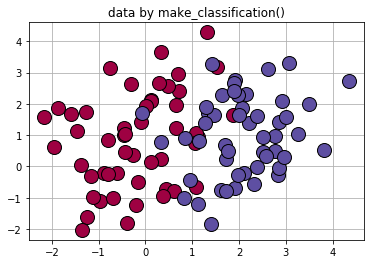

epoch 0 cost 0.6931471805599454
epoch 100 cost 0.5118090302674716
epoch 200 cost 0.4419108732639647
epoch 300 cost 0.40269085039260805
epoch 400 cost 0.37691867505111415
epoch 500 cost 0.3584623277779353
epoch 600 cost 0.3444860766883771
epoch 700 cost 0.33347482228724523
epoch 800 cost 0.32453972587761504
epoch 900 cost 0.3171226970514181
the train accuracy score: 0.8875 
the test accuracy score: 0.9 


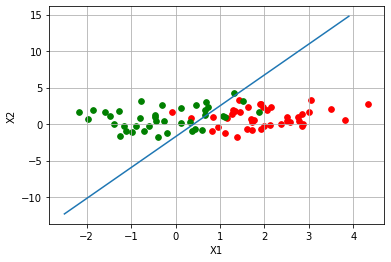

In [17]:
# 导入 numpy 模块，矩阵计算
import numpy as np

# 利用 matplotlib 进行可视化操作
import matplotlib.pyplot as plt
# jupyter notebook 中嵌入 matplotlib 绘制的图形
%matplotlib inline

# 使用 sklearn 生成模拟的二分类数据集
from sklearn.datasets.samples_generator import make_classification

"""
# 定义函数，实现 sigmoid 函数
# inputs：数据 x
# outputs：sigmoid 函数值 z
"""
def Sigmoid(x):
    # sigmoid 函数
    z = 1 / (1 + np.exp(-x))
    
    return z

"""
# 定义函数，初始化模型参数 W 和 b
# inputs：数据集维度 dims
# outputs：返回模型参数 W 和 b
"""
def Initialize_Params(dims):
    # 简单初始化模型超参数为零
    W = np.zeros((dims, 1))
    b = 0
    
    return W, b

"""
# 定义函数，logistics 模型的算法核心
# inputs：数据集矩阵X，标签y，模型参数权重系数矩阵 W，偏置系数 b
# outputs：核心算法模型core_model，交叉损失熵 cost，梯度偏导 dW，db
"""
def Logistic(X, y, W, b):
    # 获取数据集维度信息
    train_size = X.shape[0]
    feature_size = X.shape[1]
    
    # 核心算法模型
    core_model = Sigmoid(np.dot(X, W) + b)
    
    # 计算交叉损失函数
    cost = -1 / train_size * np.sum(y * np.log(core_model) + (1 - y)* np.log(1 - core_model))
    
    # 计算偏导数
    dW = np.dot(X.T, (core_model - y)) / train_size
    db = np.sum(core_model - y) / train_size
    
    # 在机器学习和深度学习中，通常算法的结果是可以表示向量的数组（即包含两对或以上的方括号形式[[]]），
    # 如果直接利用这个数组进行画图可能显示界面为空。
    # 可以利用 squeeze() 函数将表示向量的数组转换为秩为 1 的数组，这样利用matplotlib库函数画图时，就可以正常的显示结果了
    # squeeze 函数删除单维度
    cost = np.squeeze(cost)
    
    return core_model, cost, dW, db

"""
# 定义函数，实现 logistics 模型的训练
# inputs：数据集矩阵X，标签y，梯度下降步长（学习率）learning_rate, 数据集训练次数 epochs
# outputs：每次训练交叉熵列表值 cost_list，模型参数字典params，偏导数参数 grads
"""
def Logistic_Train(X, y, learning_rate, epochs):
    # 初始化模型参数
    W, b = Initialize_Params(X.shape[1])
    
    # 储存每次训练后的交叉熵
    cost_list = []
    
    # 训练模型
    for i in range(epochs):
        # logistic 核心算法
        core_model, cost, dW, db = Logistic(X, y, W, b)
        
        # 更新梯度，迭代优化参数
        W = W - learning_rate * dW
        b = b - learning_rate * db
        
        # 每一100 次训练，将交叉熵加入列表，同时打印交叉熵
        if i % 100 == 0:
            cost_list.append(cost)
            print("epoch {} cost {}".format(i, cost))
            
    # 保存最终训练结束后的超参数
    params = {"W" : W, "b" : b}
    
    # 保存最终训练结束后的梯度信息
    grads = {"dW" : dW, "db" : db}
    
    return cost_list, params, grads

"""
# 定义函数，使用训练好的模型参数进行预测数据
# inputs：数据集 X，模型参数 params
# outputs：返回预测结果 y_prediction
"""
def Predict(X, params):
    # 使用训练好的参数预测数据
    y_prediction = Sigmoid(np.dot(X, params['W']) + params['b'])

    # 对预测值概率p，进行分类 if p > 0.5 and 1 或者 else 0
    # 即就是求解最大似然估计统计量
    for i in range(len(y_prediction)):
        # 如果预测概率大于 0.5，划分为 1 这一类
        if y_prediction[i] > 0.5:
            y_prediction[i] = 1
        # 预测概率低于0.5，则划分为 0 这一类
        else:
            y_prediction[i] = 0
    
    return y_prediction

"""
# 定义函数，计算预测的准确率accuracy
# inputs：真实值y，预测值y_hat
# outputs：准确率accuracy_score
"""
def Accuracy(y, y_hat):
    # 储存计算预测正确的数量
    correct_count = 0
    
    # 统计预测正确的数量
    for i in range(len(y)):
        for j in range(len(y_hat)):
            if y[i] == y_hat[j] and i == j:
                correct_count += 1
    
    # compute accuracy score             
    accuracy_score = correct_count / len(y)
    
    return accuracy_score

"""
# 定义函数，用于模型的数据准备
# 1、生成模型二分类的数据集，
# 2、并添加高斯噪声
# 3、数据集划分训练集 train 和测试集 test
# 4、查看数据集维度情况以及基本信息
"""
def Data_Processing():
    # 生成模型二分类数据集
    X, labels = make_classification(n_samples=100, n_features=2, n_redundant=0, n_informative=2, random_state=42, n_clusters_per_class=2)

    # 生成一组伪随机数
    rng = np.random.RandomState(42)
    
    # 为数据集添加类似高斯白噪声
    X += 2 * rng.uniform(size=X.shape)
    
    # 分类器的类别标签，设置为 2 类
    unique_lables = set(labels)
    
    # 简单划分数据集    
    split_size = int(X.shape[0] * 0.8)
    X_train, y_train = X[:split_size], labels[:split_size].reshape((-1, 1))
    X_test, y_test = X[split_size:], labels[split_size:].reshape((-1, 1))
    
    # 查看数据维度信息，以及基本信息
    print("X_train shape = ", X_train.shape)
    print("X_test shape = ", X_test.shape)
    print("y_train shape = ", y_train.shape)
    print("y_test shape = ", y_test.shape)
    
    print("X_train data = ", X_train[:5])    
    print("y_train data = ", y_train[:5])
    
    return X, X_train, y_train, X_test, y_test

"""
# 定义函数，可视化生成的数据分布
# inputs：生成的模型二分类数据集 X
# outputs：matplotlib 绘制数据集分布情况
"""
def Data_Visualization(X): 
    # 设置数据点的颜色
    colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_lables)))
    
    # 绘制数据分布
    for k, col in zip(unique_lables, colors):
        x_k = X[labels == k]
        plt.plot(x_k[:, 0], x_k[:, 1], 'o', markerfacecolor=col, markeredgecolor="k", markersize=14)
    
    # 设置图形的基本信息
    plt.title("data by make_classification()")
    plt.grid()
    plt.show()


"""
# 定义函数，实现 logistic 模型的分类效果可视化
# inputs：训练集数据X_train, y_train, 模型参数 params
# outputs：训练分类结果可视化
"""
def Plot_Logistic(X_train, y_train, params):
    # 数据集维度
    n = X_train.shape[0]
    
    # 储存分类的数据情况
    xcord1 = []
    ycord1 = []
    xcord0 = []    
    ycord0 = []
    
    # 遍历计算添加分类结果
    for i in range(n):
        if y_train[i] == 1:
            xcord1.append(X_train[i][0])
            ycord1.append(X_train[i][1])
        else:
            xcord0.append(X_train[i][0])
            ycord0.append(X_train[i][1])
            
    # 创建 matplotlib 画布
    fig = plt.figure()
    # 创建 matplotlib 子图
    ax = fig.add_subplot(1, 1, 1)
    # 绘制分类数据散点图
    ax.scatter(xcord1, ycord1, s=32, c='red')
    ax.scatter(xcord0, ycord0, s=32, c='green')
    
    # 绘制分类器的决策边界
    x = np.arange(-2.5, 4, 0.2)
    # 分类器函数决策边界
    y = (-params['b'] - params['W'][0] * x) / params['W'][1]
    # 绘制决策边界
    ax.plot(x, y)
    
    # 设置图形的基本信息
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.grid()
    plt.show()
    

"""
# 定义主函数，完成 sigmoid 模型算法的整个流程处理
# 0、数据准备
# 1、可视化数据集分布
# 2、训练 logistics 分类器模型
# 3、使用训练的模型预测 test 数据集，并计算准确率 accuracy
# 4、可视化分类器的决策边界
"""
def main():
    # 数据准备
    X, X_train, y_train, X_test, y_test = Data_Processing()
    
    # 可视化数据集分布情况
    Data_Visualization(X)
    
    # 训练模型
    cost_list, params, grads = Logistic_Train(X_train, y_train, 1e-2, 1000)
    
    # 使用训练好的参数进行预测
    y_prediction = Predict(X_test, params)
    # print(y_prediction)
    
    y_train_pred = predict(X_train, params)
    # print(y_train_pred)
    
    # 计算准确率
    accuracy_score_train = Accuracy(y_train, y_train_pred)
    print("the train accuracy score: {} ".format(accuracy_score_train))
    
    accuracy_score_test = Accuracy(y_test, y_prediction)
    print("the test accuracy score: {} ".format(accuracy_score_test))
    
    # 可视化训练分类的决策边界
    Plot_Logistic(X_train, y_train, params)
    

# 执行所有代码
# if __name__ == "__main__":
#     main()
main()